## Forecasting assignment- Q2

###  Q. Forecast the CocaCola prices data set.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose #Splitting plots(Trend, Season)
from statsmodels.tsa.stattools import adfuller # Checking for stationarity in data
from statsmodels.tsa.statespace.tools import diff # Order differenciating
import statsmodels.graphics.tsaplots as sgt #PACF and ACF plots
from statsmodels.tsa.arima_model import ARMA #for AR and MA models
from scipy.stats.distributions import chi2 # Using it in LLR test(Log-likliyhood ratio)
from statsmodels.tsa.arima_model import ARIMA #for ARIMA models
from sklearn.metrics import mean_squared_error #for finding RMSE
from math import sqrt


In [3]:
# Read the file and data
data= pd.read_excel('CocaCola_Sales_Rawdata.xlsx',parse_dates= True, index_col='Quarter')
data.index.freq='QS'
data.dropna(inplace = True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
Sales    42 non-null float64
dtypes: float64(1)
memory usage: 672.0+ bytes


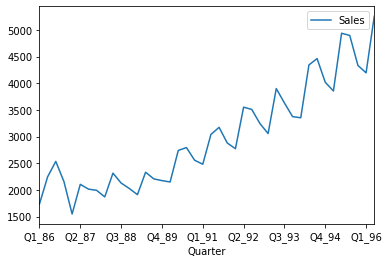

In [5]:
#Plot the data
data.plot()

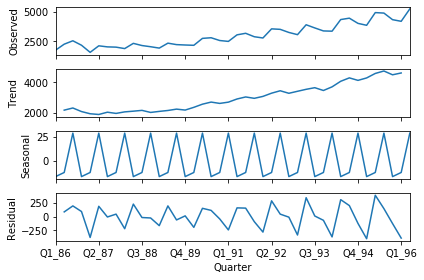

In [6]:
# Splitting the plots for better understanding
decompose= seasonal_decompose(data.Sales,freq=3,model='additive').plot()

In [7]:
#Function for checking the stationarity
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [8]:
#Checking the stationarity of sales
adf_test(data.Sales)

Fail to reject the null hypothesis
Data is non-stationary


In [9]:
# Do first order differencing

In [10]:
data['d1'] = diff(data['Sales'],k_diff=1)
adf_test(data['d1'])


Fail to reject the null hypothesis
Data is non-stationary


In [11]:
# Do second order differencing

In [12]:
data['d2'] = diff(data['Sales'],k_diff=2)
adf_test(data['d2'])

Reject the null hypothesis
Data is stationary


### Check for best AR model manually

#### LLR test to validate moving for the next model is worth or not based on the p-value

In [55]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [15]:
## PACF for sales

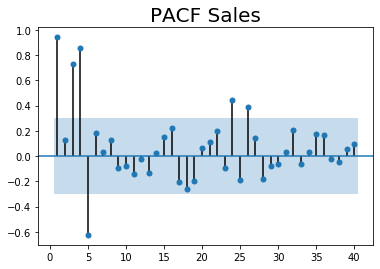

In [16]:
sgt.plot_pacf(data.Sales, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Sales", size=20)
plt.show()

### simple AR Models for Sales

In [17]:
model_ar1 = ARMA(data.Sales,order=(1,0))
result_ar1 = model_ar1.fit()
result_ar1.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(1, 0)   Log Likelihood                -315.765
Method:                       css-mle   S.D. of innovations            434.561
Date:                Sun, 27 Feb 2022   AIC                            637.530
Time:                        01:00:51   BIC                            642.743
Sample:                             0   HQIC                           639.441
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3200.2588    817.369      3.915      0.000    1598.244    4802.273
ar.L1.Sales     0.9365      0.058     16.172      0.000       0.823       1.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0679           +0.0000j            1.0679            0.0000
-----------------------------------------------------------------------------
"""

### Higher-Lag AR Models for Sales

In [18]:
model_ar2 = ARMA(data.Sales,order=(2,0))
result_ar2 = model_ar2.fit()
result_ar2.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(2, 0)   Log Likelihood                -315.611
Method:                       css-mle   S.D. of innovations            432.794
Date:                Sun, 27 Feb 2022   AIC                            639.222
Time:                        01:00:51   BIC                            646.173
Sample:                             0   HQIC                           641.770
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3213.9696    870.668      3.691      0.001    1507.492    4920.447
ar.L1.Sales     0.8489      0.167      5.068      0.000       0.521       1.177
ar.L2.Sales     0.0946      0.170      0.557      0.581      -0.238       0.427
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0543           +0.0000j            1.0543            0.0000
AR.2          -10.0321           +0.0000j           10.0321            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
LLR_test(result_ar1, result_ar2)

0.579

In [20]:
model_ar3 = ARMA(data.Sales,order=(3,0))
result_ar3 = model_ar3.fit()
result_ar3.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(3, 0)   Log Likelihood                -306.519
Method:                       css-mle   S.D. of innovations            341.938
Date:                Sun, 27 Feb 2022   AIC                            623.038
Time:                        01:00:52   BIC                            631.727
Sample:                             0   HQIC                           626.223
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3357.2383   1152.266      2.914      0.006    1098.838    5615.638
ar.L1.Sales     0.7903      0.134      5.877      0.000       0.527       1.054
ar.L2.Sales    -0.4513      0.174     -2.596      0.013      -0.792      -0.111
ar.L3.Sales     0.6411      0.127      5.030      0.000       0.391       0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0109           -0.0000j            1.0109           -0.0000
AR.2           -0.1535           -1.2327j            1.2422           -0.2697
AR.3           -0.1535           +1.2327j            1.2422            0.2697
-----------------------------------------------------------------------------
"""

In [21]:
LLR_test(result_ar2, result_ar3)

0.0

In [22]:
model_ar4 = ARMA(data.Sales,order=(4,0))
result_ar4 = model_ar4.fit()
result_ar4.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(4, 0)   Log Likelihood                -301.856
Method:                       css-mle   S.D. of innovations            302.139
Date:                Sun, 27 Feb 2022   AIC                            615.713
Time:                        01:00:53   BIC                            626.139
Sample:                             0   HQIC                           619.534
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3402.1709   1231.019      2.764      0.009     989.418    5814.924
ar.L1.Sales     0.5115      0.146      3.498      0.001       0.225       0.798
ar.L2.Sales    -0.2561      0.159     -1.609      0.116      -0.568       0.056
ar.L3.Sales     0.2586      0.164      1.573      0.124      -0.064       0.581
ar.L4.Sales     0.4756      0.143      3.331      0.002       0.196       0.755
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0039           -0.0000j            1.0039           -0.0000
AR.2            0.0680           -1.1133j            1.1154           -0.2403
AR.3            0.0680           +1.1133j            1.1154            0.2403
AR.4           -1.6836           -0.0000j            1.6836           -0.5000
-----------------------------------------------------------------------------
"""

In [23]:
LLR_test(result_ar3, result_ar4)

0.002

In [24]:
model_ar5 = ARMA(data.Sales,order=(5,0))
result_ar5 = model_ar5.fit()
result_ar5.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(5, 0)   Log Likelihood                -282.280
Method:                       css-mle   S.D. of innovations            164.566
Date:                Sun, 27 Feb 2022   AIC                            578.559
Time:                        01:00:57   BIC                            590.723
Sample:                             0   HQIC                           583.018
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.249e+04        nan        nan        nan         nan         nan
ar.L1.Sales     0.8920      0.001    706.849      0.000       0.890       0.894
ar.L2.Sales    -0.0315      0.028     -1.111      0.274      -0.087       0.024
ar.L3.Sales     0.0800      0.028      2.827      0.008       0.025       0.135
ar.L4.Sales     0.8912      0.003    274.615      0.000       0.885       0.898
ar.L5.Sales    -0.8317      0.003   -238.823      0.000      -0.839      -0.825
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0396           -0.0000j            1.0396           -0.5000
AR.2           -0.0130           -1.0084j            1.0085           -0.2520
AR.3           -0.0130           +1.0084j            1.0085            0.2520
AR.4            1.0002           -0.0000j            1.0002           -0.0000
AR.5            1.1369           -0.0000j            1.1369           -0.0000
-----------------------------------------------------------------------------
"""

In [25]:
#LLR_test(result_ar4, result_ar5)

In [26]:
#model_ar6 = ARMA(data.Sales.dropna(),order=[6,0])
#result_ar6 = model_ar6.fit()
#result_ar6.summary()
# Not executing due the error- LinAlgError: SVD did not converge

### Analysing the Residuals

In [27]:
data['res_ret'] = result_ar5.resid

In [28]:
# Residual mean
data.res_ret.mean()

-442.5811336012848

In [29]:
data.res_ret.var()

10345749.780748976

#### Residuals must be stationary

In [30]:
adfuller(data.res_ret)

(-121.0456477810908,
 0.0,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 395.87020968248294)

#### No autocorrelation between residuals

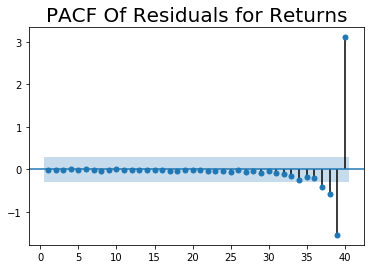

In [31]:
sgt.plot_pacf(data.res_ret, zero = False, lags = 40)
plt.title("PACF Of Residuals for Returns",size=20)
plt.show()

In [32]:
#### Residuals ust be random

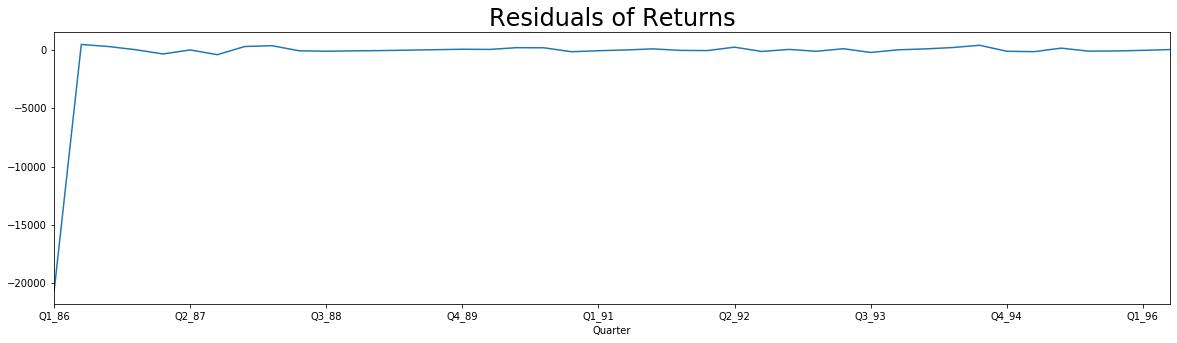

In [33]:
data.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

### Check for best MA model manually

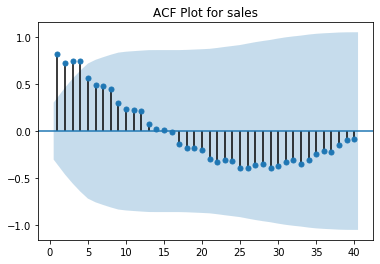

In [34]:
#ACF plots
sgt.plot_acf(data.Sales,lags=40,zero= False, title='ACF Plot for sales')
plt.show()

#### Simple MA model

In [35]:
model_ma1 = ARMA(data.Sales,order = (0,1))
result_ma1 = model_ma1.fit()
result_ma1.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(0, 1)   Log Likelihood                -333.381
Method:                       css-mle   S.D. of innovations            672.608
Date:                Sun, 27 Feb 2022   AIC                            672.763
Time:                        01:00:59   BIC                            677.976
Sample:                             0   HQIC                           674.674
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3008.1469    173.248     17.363      0.000    2668.587    3347.707
ma.L1.Sales     0.6853      0.075      9.116      0.000       0.538       0.833
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4592           +0.0000j            1.4592            0.5000
-----------------------------------------------------------------------------
"""

#### Higher-lag MA models for sales

In [36]:
model_ma2 = ARMA(data.Sales,order = (0,2))
result_ma2 = model_ma2.fit()
result_ma2.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(0, 2)   Log Likelihood                -315.004
Method:                       css-mle   S.D. of innovations            403.028
Date:                Sun, 27 Feb 2022   AIC                            638.009
Time:                        01:00:59   BIC                            644.960
Sample:                             0   HQIC                           640.557
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3038.6913    209.209     14.525      0.000    2628.649    3448.734
ma.L1.Sales     1.4327      0.152      9.407      0.000       1.134       1.731
ma.L2.Sales     1.0000      0.112      8.935      0.000       0.781       1.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.7163           -0.6978j            1.0000           -0.3771
MA.2           -0.7163           +0.6978j            1.0000            0.3771
-----------------------------------------------------------------------------
"""

In [37]:
LLR_test(result_ma1,result_ma2)

0.0

In [38]:
#model_ma3 = ARMA(data.Sales,order = (0,3))
#result_ma3 = model_ma3.fit()
#result_ma3.summary()
#Unable to run further due to follwing error- ValueError: Insufficient degrees of freedom to estimate 

In [39]:
model_ma4 = ARMA(data.Sales,order = (0,4))
result_ma4 = model_ma4.fit()
result_ma4.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(0, 4)   Log Likelihood                -310.842
Method:                       css-mle   S.D. of innovations            351.224
Date:                Sun, 27 Feb 2022   AIC                            633.684
Time:                        01:01:01   BIC                            644.110
Sample:                             0   HQIC                           637.506
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3032.5270    205.976     14.723      0.000    2628.821    3436.233
ma.L1.Sales     0.7184      0.128      5.600      0.000       0.467       0.970
ma.L2.Sales     0.5370      0.131      4.092      0.000       0.280       0.794
ma.L3.Sales     0.7184      0.148      4.859      0.000       0.429       1.008
ma.L4.Sales     1.0000      0.130      7.709      0.000       0.746       1.254
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.4513           -0.8924j            1.0000           -0.1755
MA.2            0.4513           +0.8924j            1.0000            0.1755
MA.3           -0.8105           -0.5858j            1.0000           -0.4004
MA.4           -0.8105           +0.5858j            1.0000            0.4004
-----------------------------------------------------------------------------
"""

In [40]:
LLR_test(result_ma2,result_ma4)

0.004

In [41]:
#model_ma5 = ARMA(data.Sales,order = (0,5))
#result_ma5 = model_ma5.fit()
#result_ma5.summary()
#Unable to run further due to follwing error- ValueError: Insufficient degrees of freedom to estimate 

### Analysing the residuals

In [42]:
data['res_ret_ma'] = result_ma4.resid

In [43]:
data.res_ret_ma.mean()

-5.783167689398846

In [44]:
data.res_ret_ma.var()

180673.03479285463

#### Residuals must be stationary

In [45]:
adfuller(data.res_ret_ma)

(1.1520389925736645,
 0.9956371742405717,
 10,
 31,
 {'1%': -3.661428725118324,
  '5%': -2.960525341210433,
  '10%': -2.6193188033298647},
 397.47595162208654)

In [46]:
#### No autocorrelation between residuals

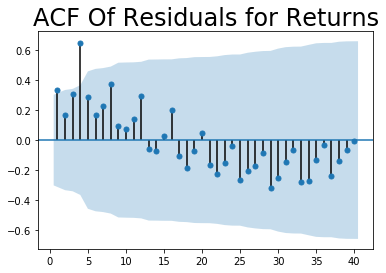

In [47]:
sgt.plot_acf(data.res_ret_ma, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

## ARIMA model

In [48]:
#### ARIMA Hyperparameters

In [49]:
# grid search ARIMA parameters for a time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse 

#### Grid search for p,d,q values

In [50]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

#### Finding the best parameters

In [51]:
# load dataset
train = data.Sales.copy()
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)   

ARIMA(0, 0, 0) RMSE=1351.795
ARIMA(0, 0, 1) RMSE=932.184
ARIMA(0, 0, 2) RMSE=557.680
ARIMA(0, 1, 0) RMSE=522.798
ARIMA(0, 1, 1) RMSE=483.542
ARIMA(0, 1, 2) RMSE=454.200
ARIMA(0, 1, 4) RMSE=292.540
ARIMA(0, 2, 0) RMSE=753.961
ARIMA(0, 2, 1) RMSE=542.823
ARIMA(1, 0, 0) RMSE=579.704
ARIMA(1, 0, 1) RMSE=550.756
ARIMA(1, 1, 0) RMSE=521.767
ARIMA(1, 1, 1) RMSE=472.269
ARIMA(1, 2, 0) RMSE=760.131
ARIMA(1, 2, 1) RMSE=543.216
ARIMA(2, 0, 0) RMSE=584.883
ARIMA(2, 0, 1) RMSE=535.550
ARIMA(2, 1, 0) RMSE=372.795
ARIMA(2, 1, 1) RMSE=348.598
ARIMA(2, 2, 0) RMSE=627.362
ARIMA(2, 2, 1) RMSE=379.105
ARIMA(3, 0, 0) RMSE=447.834
ARIMA(3, 1, 0) RMSE=259.470
ARIMA(4, 0, 0) RMSE=393.713
ARIMA(4, 1, 0) RMSE=167.867
Best ARIMA(4, 1, 0) RMSE=167.867


#### Best parameters to use in ARIMA model are p=3, d=1, q=0 ---->  (4,1,0)

### Final Model

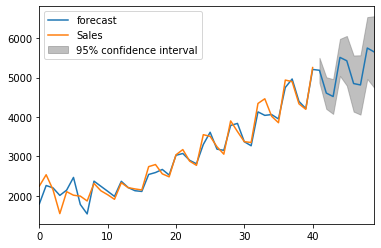

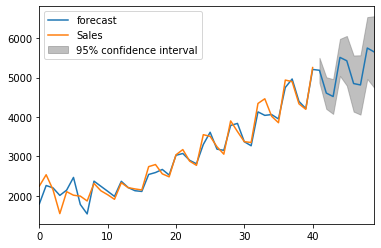

In [52]:
# fitting the final model, forecasting for 10 steps and plotting the predictions
model = ARIMA(data.Sales, order=(4,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 50) 

In [53]:
data.Sales.tail()

Quarter
Q2_95    4936.0
Q3_95    4895.0
Q4_95    4333.0
Q1_96    4194.0
Q2_96    5253.0
Name: Sales, dtype: float64

In [54]:
#Forecasted data for next 10 quarters
forecast

array([5183.6510294 , 4605.85158597, 4517.98633723, 5510.79623601,
       5425.02495695, 4847.15398409, 4811.67285786, 5748.48462791,
       5649.6827266 , 5079.57062333])